In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
from pyciemss.visuals import plots

In [3]:
g = nx.generators.barabasi_albert_graph(5, 3)

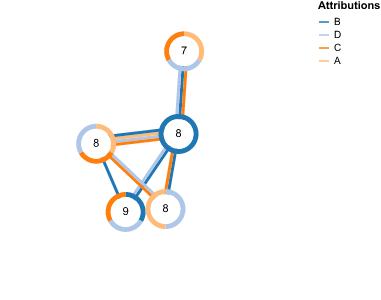

In [4]:
import random
def rand_attributions():
    possible = "ABCD"
    return random.sample(possible, random.randint(1, len(possible)))

def rand_label():
    possible = "TUVWXYZ"
    return random.randint(1, 10)
    return random.sample(possible, 1)[0]

node_properties = {n: {"attribution": rand_attributions(), 
                       "label": rand_label()}
                    for n in g.nodes()}

edge_attributions = {e: {"attribution": rand_attributions()} for e in g.edges()}

nx.set_node_attributes(g, node_properties)
nx.set_edge_attributes(g, edge_attributions)

schema = plots.attributed_graph(g)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema)

In [5]:
g = nx.generators.barabasi_albert_graph(5, 3)
nx.set_node_attributes(g, {k:f"n{i}" for i, k in enumerate(g.nodes)}, "label")
schema = plots.spring_force_graph(g, node_labels="label")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")

In [6]:
import pandas as pd
import numpy as np

df = pd.DataFrame(3*np.random.random((100, 2)), columns=['test4', 'test5'])
schema = plots.heatmap_scatter(df, max_x_bins=4, max_y_bins=4)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")

In [7]:
import numpy as np
import pandas as pd
from pyciemss.visuals import plots, vega

def create_fake_data():
    nx, ny = (10, 10)
    x = np.linspace(0, 10, nx)
    y, a = np.linspace(0, 10, ny, retstep = True)

    # create mesh data
    xv, yv = np.meshgrid(x, y)
    zz = xv**2 + yv**2

    # create scatter plot
    df = pd.DataFrame(10*np.random.random((100, 2)), columns=['alpha', 'gamma'])
    return (xv, yv, zz), df

mesh_data, scatter_data = create_fake_data()

schema = plots.heatmap_scatter(scatter_data, mesh_data)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")